In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
tb_hotel = pd.read_csv('data/tb_hotel_aula.csv')
tb_test = pd.read_csv('data/tb_hotel_test_clean.csv')
tb_train = pd.read_csv('data/tb_hotel_train_clean.csv')

In [6]:
tb_hotel['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [4]:
tb_train

,lead_time,adults,children_imp,num_meal,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CHN,country_grp_CN,country_grp_DEU,...,country_grp_ISR,country_grp_ITA,country_grp_NLD,country_grp_Others,country_grp_POL,country_grp_PRT,country_grp_SWE,country_grp_USA,is_company,is_cancelled
0,0.667408,0.242367,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.334738,0.242367,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.700005,0.242367,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.817261,0.242367,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,-0.531420,0.242367,-0.260384,1.947038,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87211,-0.774932,-1.442963,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87212,1.491602,0.242367,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87213,-0.962249,-1.442963,-0.260384,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
87214,-0.915420,-1.442963,4.754730,-0.073565,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


# Modelos de Classificação

## Estimando Probabilidades Condicionais

In [7]:
tb_hotel.groupby('meal')['is_cancelled'].mean()

meal
BB           0.373849
FB           0.598997
HB           0.344603
SC           0.372394
Undefined    0.244654
Name: is_cancelled, dtype: float64

In [8]:
tb_hotel['lead_time'].head()

0    342
1    737
2      7
3     13
4     14
Name: lead_time, dtype: int64

In [11]:
tb_hotel['grp_lead_time'] = pd.qcut(tb_hotel['lead_time'], 5)

In [12]:
tb_hotel.groupby('grp_lead_time')['is_cancelled'].mean()

grp_lead_time
(-0.001, 11.0]    0.116577
(11.0, 45.0]      0.321015
(45.0, 99.0]      0.394542
(99.0, 184.0]     0.449833
(184.0, 737.0]    0.572620
Name: is_cancelled, dtype: float64

## Regressão Logística Simples

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
tb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87216 entries, 0 to 87215
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lead_time           87216 non-null  float64
 1   adults              87216 non-null  float64
 2   children_imp        87216 non-null  float64
 3   num_meal            87216 non-null  float64
 4   country_grp_BEL     87216 non-null  float64
 5   country_grp_BRA     87216 non-null  float64
 6   country_grp_CHE     87216 non-null  float64
 7   country_grp_CHN     87216 non-null  float64
 8   country_grp_CN      87216 non-null  float64
 9   country_grp_DEU     87216 non-null  float64
 10  country_grp_ESP     87216 non-null  float64
 11  country_grp_FRA     87216 non-null  float64
 12  country_grp_GBR     87216 non-null  float64
 13  country_grp_IRL     87216 non-null  float64
 14  country_grp_ISR     87216 non-null  float64
 15  country_grp_ITA     87216 non-null  float64
 16  coun

In [17]:
X_train = tb_train[['lead_time']]
y_train = tb_train['is_cancelled']

m1 = LogisticRegression()
m1.fit(X_train, y_train)

LogisticRegression()

### Visualizando as probabilidades estimadas

In [18]:
m1.predict_proba(X_train)

array([[0.5196441 , 0.4803559 ],
       [0.68479066, 0.31520934],
       [0.73691928, 0.26308072],
       ...,
       [0.77073708, 0.22926292],
       [0.76492903, 0.23507097],
       [0.56810166, 0.43189834]])

In [19]:
m1.predict_proba(X_train)[:,1]

array([0.4803559 , 0.31520934, 0.26308072, ..., 0.22926292, 0.23507097,
       0.43189834])

In [20]:
tb_train['pred_prob_m1'] = m1.predict_proba(X_train)[:,1]

<AxesSubplot:xlabel='lead_time', ylabel='pred_prob_m1'>

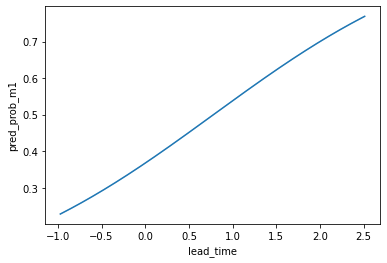

In [22]:
sns.lineplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m1')

In [23]:
m1.coef_

array([[0.69576674]])

In [24]:
m1.intercept_

array([-0.54297695])

## Aumentando o # de Variáveis

In [25]:
X_train = tb_train[['lead_time', 'adults']]
y_train = tb_train['is_cancelled']

m2 = LogisticRegression()
m2.fit(X_train, y_train)

LogisticRegression()

In [26]:
tb_train['pred_prob_m2'] = m2.predict_proba(X_train)[:,1]

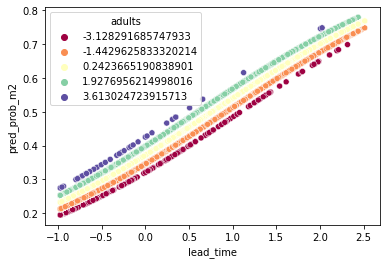

In [27]:
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m2', hue = 'adults', palette = 'Spectral');

In [28]:
tb_train.describe()

,lead_time,adults,children_imp,num_meal,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CHN,country_grp_CN,country_grp_DEU,...,country_grp_NLD,country_grp_Others,country_grp_POL,country_grp_PRT,country_grp_SWE,country_grp_USA,is_company,is_cancelled,pred_prob_m1,pred_prob_m2
count,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,...,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000
mean,-0.082553,-0.007295,0.001798,-0.009135,0.019973,0.018999,0.014963,0.008542,0.010480,0.059083,...,0.018093,0.068772,0.007694,0.404341,0.009012,0.017932,0.058372,0.361986,0.361986,0.361986
std,0.864923,0.831779,0.992297,1.002641,0.139910,0.136521,0.121405,0.092028,0.101833,0.235782,...,0.133289,0.253067,0.087375,0.490767,0.094504,0.132707,0.234447,0.480578,0.138126,0.138532
min,-0.971615,-3.128292,-0.260384,-2.094169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228113,0.194543
25%,-0.812396,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248204,0.249788
50%,-0.353469,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312403,0.314825
75%,0.442627,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.441516,0.442724
max,2.512479,3.613025,4.754730,3.967642,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.769435,0.779131


#### Visualizando através de Simulações

In [32]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

In [30]:
np.linspace(tb_train['adults'].min(), 4, 100)

array([-3.12829169, -3.05628874, -2.98428579, -2.91228285, -2.8402799 ,
       -2.76827695, -2.69627401, -2.62427106, -2.55226812, -2.48026517,
       -2.40826222, -2.33625928, -2.26425633, -2.19225338, -2.12025044,
       -2.04824749, -1.97624454, -1.9042416 , -1.83223865, -1.76023571,
       -1.68823276, -1.61622981, -1.54422687, -1.47222392, -1.40022097,
       -1.32821803, -1.25621508, -1.18421214, -1.11220919, -1.04020624,
       -0.9682033 , -0.89620035, -0.8241974 , -0.75219446, -0.68019151,
       -0.60818856, -0.53618562, -0.46418267, -0.39217973, -0.32017678,
       -0.24817383, -0.17617089, -0.10416794, -0.03216499,  0.03983795,
        0.1118409 ,  0.18384385,  0.25584679,  0.32784974,  0.39985268,
        0.47185563,  0.54385858,  0.61586152,  0.68786447,  0.75986742,
        0.83187036,  0.90387331,  0.97587625,  1.0478792 ,  1.11988215,
        1.19188509,  1.26388804,  1.33589099,  1.40789393,  1.47989688,
        1.55189983,  1.62390277,  1.69590572,  1.76790866,  1.83

In [39]:
adults_simul = list(np.linspace(-1, 1, 100))
lead_time_simul = [0] * 100
tb_simul_adults = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul_adults.head()

,lead_time,adults
0,0,-1.000000
1,0,-0.979798
2,0,-0.959596
3,0,-0.939394
4,0,-0.919192


In [40]:
tb_simul_adults['prob_cancelled'] = m2.predict_proba(tb_simul_adults[['lead_time', 'adults']])[:,1]

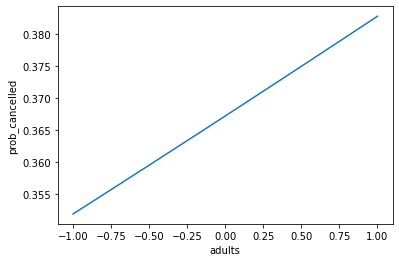

In [41]:
sns.lineplot(data = tb_simul_adults, x = 'adults', y = 'prob_cancelled');

In [45]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 1, 100))
adults_simul = [0] * 100
tb_simul_lead_time= pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul_lead_time.head()

,lead_time,adults
0,-0.971615,0
1,-0.951700,0
2,-0.931784,0
3,-0.911869,0
4,-0.891954,0


In [46]:
tb_simul_lead_time['prob_cancelled'] = m2.predict_proba(tb_simul_lead_time[['lead_time', 'adults']])[:,1]

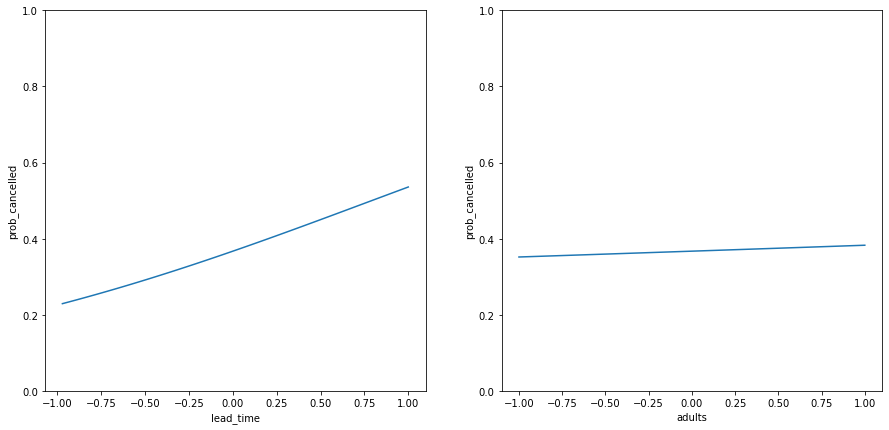

In [47]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.lineplot(data = tb_simul_lead_time, x = 'lead_time', y = 'prob_cancelled', ax = ax[0])
sns.lineplot(data = tb_simul_adults, x = 'adults', y = 'prob_cancelled', ax = ax[1])
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1);

In [52]:
tb_train.describe()

,lead_time,adults,children_imp,num_meal,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CHN,country_grp_CN,country_grp_DEU,...,country_grp_NLD,country_grp_Others,country_grp_POL,country_grp_PRT,country_grp_SWE,country_grp_USA,is_company,is_cancelled,pred_prob_m1,pred_prob_m2
count,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,...,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000,87216.000000
mean,-0.082553,-0.007295,0.001798,-0.009135,0.019973,0.018999,0.014963,0.008542,0.010480,0.059083,...,0.018093,0.068772,0.007694,0.404341,0.009012,0.017932,0.058372,0.361986,0.361986,0.361986
std,0.864923,0.831779,0.992297,1.002641,0.139910,0.136521,0.121405,0.092028,0.101833,0.235782,...,0.133289,0.253067,0.087375,0.490767,0.094504,0.132707,0.234447,0.480578,0.138126,0.138532
min,-0.971615,-3.128292,-0.260384,-2.094169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228113,0.194543
25%,-0.812396,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248204,0.249788
50%,-0.353469,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312403,0.314825
75%,0.442627,0.242367,-0.260384,-0.073565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.441516,0.442724
max,2.512479,3.613025,4.754730,3.967642,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.769435,0.779131


In [48]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 2, 100)) * 5
adults_simul = [-1] * 100 + [-0.5] * 100  + [0] * 100 + [0.5] * 100 + [1] * 100
tb_simul = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul.head()

,lead_time,adults
0,-0.971615,-1.0
1,-0.941599,-1.0
2,-0.911582,-1.0
3,-0.881566,-1.0
4,-0.851550,-1.0


In [49]:
lead_time_simul = list(np.linspace(tb_train['lead_time'].min(), 2, 100)) * 5
adults_simul = [-1] * 100 + [-0.5] * 100  + [0] * 100 + [0.5] * 100 + [1] * 100
tb_simul = pd.DataFrame({'lead_time' : lead_time_simul, 'adults' : adults_simul})
tb_simul.head()

,lead_time,adults
0,-0.971615,-1.0
1,-0.941599,-1.0
2,-0.911582,-1.0
3,-0.881566,-1.0
4,-0.851550,-1.0


In [50]:
tb_simul['prob_cancelled'] = m2.predict_proba(tb_simul[['lead_time', 'adults']])[:,1]

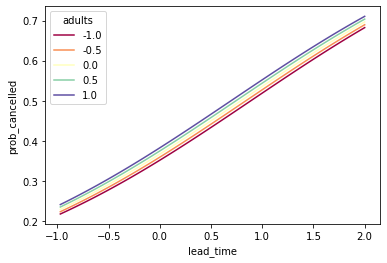

In [51]:
sns.lineplot(data = tb_simul, x = 'lead_time', y = 'prob_cancelled', hue = 'adults', palette='Spectral');

## *Thresholding* para Classificação

In [57]:
from collections import Counter

In [58]:
Counter(m1.predict(tb_train[['lead_time']]))

Counter({0: 72167, 1: 15049})

In [59]:
tb_train['is_cancelled'].value_counts()

0    55645
1    31571
Name: is_cancelled, dtype: int64

In [60]:
tb_train['pred_canc_m1'] = m1.predict(tb_train[['lead_time']])
tb_train[['is_cancelled', 'pred_canc_m1']]

,is_cancelled,pred_canc_m1
0,1,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
87211,0,0
87212,1,1
87213,1,0
87214,0,0


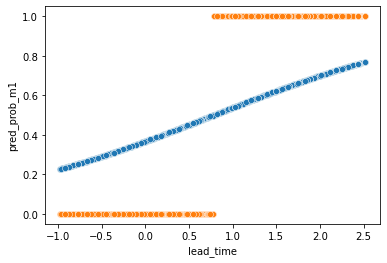

In [61]:
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_prob_m1');
sns.scatterplot(data = tb_train, x = 'lead_time', y = 'pred_canc_m1');

In [64]:
tb_train[['is_cancelled', 'pred_prob_m1', 'pred_canc_m1']].head(20)

,is_cancelled,pred_prob_m1,pred_canc_m1
0,1,0.480356,0
1,0,0.315209,0
2,1,0.263081,0
3,1,0.506411,1
4,0,0.286443,0
5,0,0.643956,1
6,0,0.490122,0
7,0,0.228113,0
8,0,0.265615,0
9,0,0.232736,0


### Visualizando a Superficie de Decisão

In [65]:
from mlxtend.plotting import plot_decision_regions

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

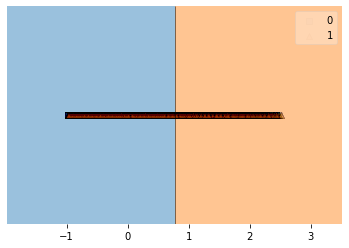

In [66]:
plot_decision_regions(np.array(tb_train[['lead_time']]), 
                      np.array(tb_train['is_cancelled']), 
                      m1, scatter_kwargs={'alpha':0.01})

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

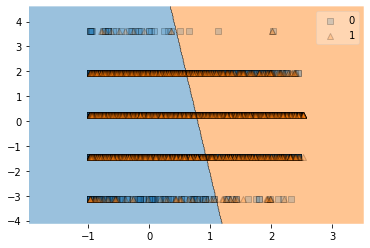

In [69]:
plot_decision_regions(np.array(tb_train[['lead_time', 'adults']]), 
                      np.array(tb_train['is_cancelled']), 
                      m2, scatter_kwargs={'alpha':0.2})

## Modelo Completo

In [70]:
tb_train.columns

Index(['lead_time', 'adults', 'children_imp', 'num_meal', 'country_grp_BEL',
       'country_grp_BRA', 'country_grp_CHE', 'country_grp_CHN',
       'country_grp_CN', 'country_grp_DEU', 'country_grp_ESP',
       'country_grp_FRA', 'country_grp_GBR', 'country_grp_IRL',
       'country_grp_ISR', 'country_grp_ITA', 'country_grp_NLD',
       'country_grp_Others', 'country_grp_POL', 'country_grp_PRT',
       'country_grp_SWE', 'country_grp_USA', 'is_company', 'is_cancelled',
       'pred_prob_m1', 'pred_prob_m2', 'pred_canc_m1'],
      dtype='object')

In [71]:
X_train = tb_train.drop(['is_cancelled', 'pred_prob_m1', 'pred_prob_m2', 'pred_canc_m1'], axis = 1)
y_train = tb_train['is_cancelled']
X_test = tb_test.drop('is_cancelled', axis = 1)
y_test = tb_test['is_cancelled']

In [72]:
m3 = LogisticRegression()
m3.fit(X_train, y_train)

LogisticRegression()

In [74]:
X_train.columns

Index(['lead_time', 'adults', 'children_imp', 'num_meal', 'country_grp_BEL',
       'country_grp_BRA', 'country_grp_CHE', 'country_grp_CHN',
       'country_grp_CN', 'country_grp_DEU', 'country_grp_ESP',
       'country_grp_FRA', 'country_grp_GBR', 'country_grp_IRL',
       'country_grp_ISR', 'country_grp_ITA', 'country_grp_NLD',
       'country_grp_Others', 'country_grp_POL', 'country_grp_PRT',
       'country_grp_SWE', 'country_grp_USA', 'is_company'],
      dtype='object')

In [75]:
import shap

In [76]:
explainer = shap.explainers.Linear(m3, X_train)

In [77]:
shap_values = explainer(X_train)

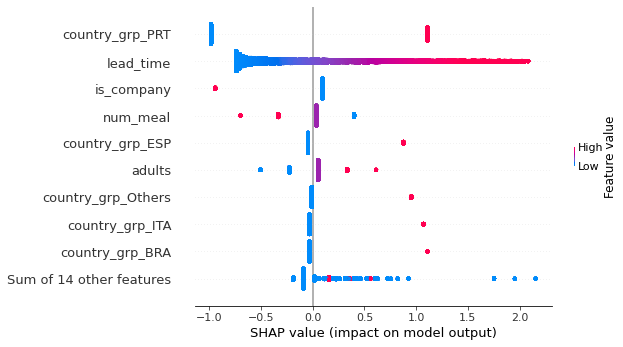

In [78]:
shap.plots.beeswarm(shap_values)